<a href="https://colab.research.google.com/github/shariq101/Ham_or_spam_classification-using-Simple-RNN/blob/main/Spam_or_Ham_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SPAM text message 20170820 - Data.csv to SPAM text message 20170820 - Data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/SPAM text message 20170820 - Data.csv")

In [ ]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
print("type of text_train: ", type(data['Message']))

type of text_train:  <class 'pandas.core.series.Series'>


In [ ]:
texts = []
labels = []
for i, label in enumerate(data['Category']):
    texts.append(data['Message'][i])
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

In [ ]:
texts = np.asarray(texts)
labels = np.asarray(labels)
print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


In [ ]:
print(texts[0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [ ]:
print(np.unique(labels))
print(np.bincount(labels))

[0 1]
[4825  747]


In [ ]:
np.random.seed(42)
# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
texts = texts[indices]
labels = labels[indices]

# we will use 80% of data as training, 20% as validation data
training_samples = int(5572 * .8)
validation_samples = int(5572 - training_samples)
# sanity check
print(len(texts) == (training_samples + validation_samples))
print("The number of training {0}, validation {1} ".format(training_samples, validation_samples))

texts_train = texts[:training_samples]
y_train = labels[:training_samples]
texts_test = texts[training_samples:]
y_test = labels[training_samples:]

True
The number of training 4457, validation 1115 


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(texts_train)
X_train = vect.transform(texts_train)
print(repr(X_train))

<4457x7773 sparse matrix of type '<class 'numpy.int64'>'
	with 59237 stored elements in Compressed Sparse Row format>


In [ ]:
X_train.shape
X_test = vect.transform(texts_test)
np.bincount(y_train)

array([3864,  593])

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(logreg, param_grid, cv=5)
logreg_train = grid.fit(X_train, y_train)
print(grid.best_estimator_)

LogisticRegression(C=100)


In [ ]:
# logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg_train.predict(X_test)
print("accuracy is: ", grid.score(X_test, y_test))

accuracy is:  0.9820627802690582


In [ ]:
confusion = confusion_matrix(y_test, pred_logreg)
print(confusion)

[[958   3]
 [ 17 137]]


In [ ]:
features_names = vect.get_feature_names()
print(len(features_names))
print("\n")
# print first 20 features
print(features_names[:20])
print("\n")
# print last 20 features
print(features_names[-20:])
print("\n")
# print every 50th word
print(features_names[::400])

7773


['00', '000', '008704050406', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06']


['yun', 'yunny', 'yuo', 'yuou', 'yup', 'yupz', 'zac', 'zaher', 'zealand', 'zebra', 'zed', 'zeros', 'zindgi', 'zoe', 'zogtorius', 'zoom', 'zouk', 'zyada', 'ú1', '〨ud']


['00', '2morrow', 'ad', 'bags', 'bye', 'convey', 'dogwood', 'fatty', 'goodnite', 'icicibank', 'lacking', 'matrix3', 'nigro', 'phd', 'rates', 'search', 'spell', 'tenants', 'unknown', 'woman']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# min_df controls this condition(min_df=3 means pick up words which appear
# at least 3 documents)
vect = CountVectorizer(min_df=3).fit(texts_train)
X_train = vect.transform(texts_train)
X_test = vect.transform(texts_test)
print(repr(X_train))

<4457x2400 sparse matrix of type '<class 'numpy.int64'>'
	with 52624 stored elements in Compressed Sparse Row format>


In [ ]:
features_names = vect.get_feature_names()
print(len(features_names))
print("\n")
# print first 20 features
print(features_names[:20])
print("\n")
# print last 20 features
print(features_names[-20:])
print("\n")
# print every 50th word
print(features_names[::400])

2400


['00', '000', '02', '03', '04', '05', '06', '07xxxxxxxxx', '0800', '08000839402', '08000930705', '08000938767', '08001950382', '08002986906', '0808', '0845', '08452810073', '0870', '08701417012', '08707509020']


['yer', 'yes', 'yest', 'yesterday', 'yet', 'yetunde', 'yijue', 'ym', 'yo', 'yoga', 'yogasana', 'you', 'your', 'yours', 'yourself', 'yr', 'yrs', 'yummy', 'yup', 'zed']


['00', 'budget', 'files', 'lets', 'pobox', 'sunny']


In [ ]:
logreg = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(logreg, param_grid, cv=5)
logreg_train = grid.fit(X_train, y_train)
# logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg_train.predict(X_test)
print("accuracy is: ", grid.score(X_test, y_test))

accuracy is:  0.9802690582959641


In [ ]:
confusion = confusion_matrix(y_test, pred_logreg)
print(confusion)

[[956   5]
 [ 17 137]]


In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words is :", len(ENGLISH_STOP_WORDS), "\n")
print("Examples: ", list(ENGLISH_STOP_WORDS)[::10])

Number of stop words is : 318 

Examples:  ['each', 'had', 'meanwhile', 'am', 'who', 'hereupon', 'is', 'full', 'down', 'etc', 'his', 'sometime', 'yours', 'in', 'anyway', 'becomes', 'seemed', 'ltd', 'how', 'then', 'made', 'there', 'con', 'anyone', 'found', 'because', 'perhaps', 'cant', 'himself', 'during', 'out', 'most']


In [ ]:
vect = CountVectorizer(min_df=3, stop_words='english').fit(texts_train)
X_train = vect.transform(texts_train)
X_test = vect.transform(texts_test)
print(repr(X_train))

<4457x2175 sparse matrix of type '<class 'numpy.int64'>'
	with 28170 stored elements in Compressed Sparse Row format>


In [ ]:
logreg = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(logreg, param_grid, cv=5)
logreg_train = grid.fit(X_train, y_train)

In [ ]:
# logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg_train.predict(X_test)
print("accuracy is: ", grid.score(X_test, y_test))
confusion = confusion_matrix(y_test, pred_logreg)
print("confusion matrix \n", confusion)

accuracy is:  0.9829596412556054
confusion matrix 
 [[960   1]
 [ 18 136]]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [ ]:
logreg = LogisticRegression()
pipe = make_pipeline(TfidfVectorizer(min_df=3, norm=None, stop_words='english'), logreg)
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
logreg_train = grid.fit(texts_train, y_train)
logreg.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [ ]:
print(grid.best_estimator_)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(min_df=3, norm=None, stop_words='english')),
                ('logisticregression', LogisticRegression(C=0.1))])


In [ ]:
# logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg_train.predict(texts_test)
print("accuracy is: ", grid.score(texts_test, y_test))
confusion = confusion_matrix(y_test, pred_logreg)
print("confusion matrix \n", confusion)

accuracy is:  0.9820627802690582
confusion matrix 
 [[960   1]
 [ 19 135]]


In [ ]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
X_train = vectorizer.transform(texts_train)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

feature_names = np.array(vectorizer.get_feature_names())

print("features with lowest tfidf")
print(feature_names[sorted_by_tfidf[:20]], '\n')

print("featues with hightest tfidf")
print(feature_names[sorted_by_tfidf[-20:]])

features with lowest tfidf
['yes' 'won' 'www' 'doing' 'care' 'pick' 'lol' 'urgent' 'contact' '150p'
 'place' 'thing' '16' 'customer' '18' 'try' 'guaranteed' 'holiday' 'mins'
 'bit'] 

featues with hightest tfidf
['hmv' 'god' 'charity' 'malaria' 'police' 'gal' 'day' 'boy' 'xmas' 'needs'
 'lose' 'smile' 'brings' 'simple' 'hi' 'missing' 'face' 'gt' 'lt' 'happy']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'tfidf-cofficient')

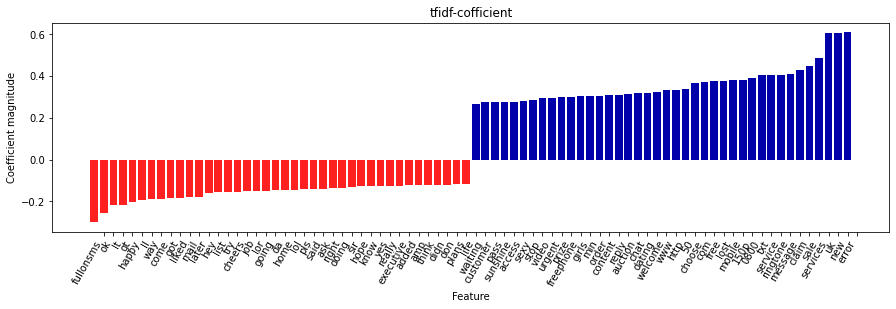

In [ ]:
import mglearn 
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps['logisticregression'].coef_, 
                                   feature_names, n_top_features=40)
plt.title("tfidf-cofficient")

In [ ]:
pipe = make_pipeline(TfidfVectorizer(min_df=3, stop_words='english'), logreg)
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'tfidfvectorizer__ngram_range': [(1,1), (1,2), (1,3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
logreg_train = grid.fit(texts_train, y_train)


pred_logreg = logreg_train.predict(texts_test)
print("accuracy is: ", grid.score(texts_test, y_test))
confusion = confusion_matrix(y_test, pred_logreg)
print("confusion matrix \n", confusion)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


accuracy is:  0.9820627802690582
confusion matrix 
 [[958   3]
 [ 17 137]]


In [ ]:
print(grid.best_estimator_)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(min_df=3, ngram_range=(1, 3),
                                 stop_words='english')),
                ('logisticregression', LogisticRegression(C=100))])


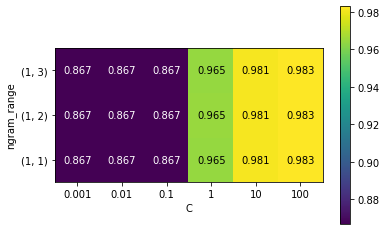

In [ ]:
scores = [s for s in pd.DataFrame(grid.cv_results_)['mean_test_score']]
scores = np.array(scores).reshape(-1, 3).T

heatmap = mglearn.tools.heatmap(scores, xlabel="C", ylabel="ngram_range", 
                                xticklabels=param_grid['logisticregression__C'], 
                                yticklabels=param_grid['tfidfvectorizer__ngram_range'], 
                                cmap='viridis', fmt="%.3f")
plt.colorbar(heatmap);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'tfidf-cofficient')

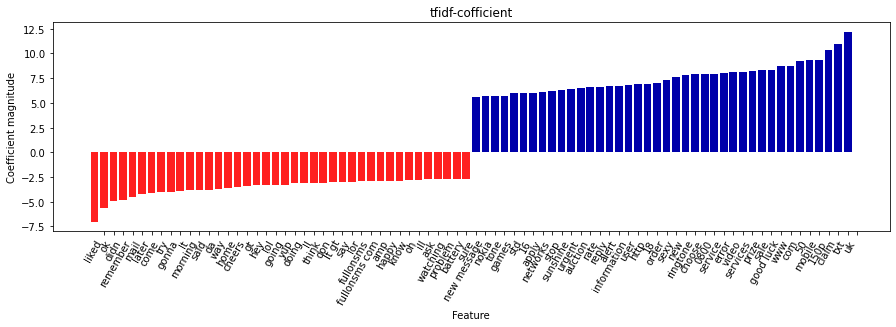

In [ ]:
feature_names = np.array(grid.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef,feature_names, n_top_features=40)
plt.title("tfidf-cofficient")

In [ ]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential
import seaborn as sns; sns.set()

In [ ]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# number of words used as features
max_features = 10000
# cut off the words after seeing 500 words in each document(email)
maxlen = 500
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Found {0} unique words: ".format(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen)

print("data shape: ", data.shape)

np.random.seed(42)
# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]


Found 9004 unique words: 
data shape:  (5572, 500)


In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 11s 145ms/step - loss: 0.3066 - acc: 0.8999 - val_loss: 0.1502 - val_acc: 0.9675
Epoch 2/10
60/60 [==============================] - 8s 137ms/step - loss: 0.0956 - acc: 0.9770 - val_loss: 0.0953 - val_acc: 0.9720
Epoch 3/10
60/60 [==============================] - 8s 134ms/step - loss: 0.0506 - acc: 0.9882 - val_loss: 0.0685 - val_acc: 0.9776
Epoch 4/10
60/60 [==============================] - 8s 135ms/step - loss: 0.0284 - acc: 0.9933 - val_loss: 0.0708 - val_acc: 0.9787
Epoch 5/10
60/60 [==============================] - 8s 135ms/step - loss: 0.0186 - acc: 0.9952 - val_loss: 0.0701 - val_acc: 0.9798
Epoch 6/10
60/60 [==============================] - 8s 132ms/step - loss: 0.0127 - acc: 0.9972 - val_loss: 0.0845 - val_acc: 0.9765
Epoch 7/10
60/60 [==============================] - 8s 133ms/step - loss: 0.0415 - acc: 0.9849 - val_loss: 0.1987 - val_acc: 0.9372
Epoch 8/10
60/60 [==============================] - 8s 129ms/step - loss: 0

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 12s 177ms/step - loss: 0.2881 - acc: 0.9060 - val_loss: 0.1512 - val_acc: 0.9652
Epoch 2/10
60/60 [==============================] - 8s 129ms/step - loss: 0.0917 - acc: 0.9790 - val_loss: 0.0981 - val_acc: 0.9720
Epoch 3/10
60/60 [==============================] - 10s 168ms/step - loss: 0.0547 - acc: 0.9857 - val_loss: 0.0789 - val_acc: 0.9787
Epoch 4/10
60/60 [==============================] - 9s 144ms/step - loss: 0.1367 - acc: 0.9484 - val_loss: 0.2396 - val_acc: 0.9114
Epoch 5/10
60/60 [==============================] - 13s 222ms/step - loss: 0.1182 - acc: 0.9557 - val_loss: 0.2024 - val_acc: 0.9406
Epoch 6/10
60/60 [==============================] - 10s 173ms/step - loss: 0.0394 - acc: 0.9877 - val_loss: 0.0930 - val_acc: 0.9731
Epoch 7/10
60/60 [==============================] - 9s 148ms/step - loss: 0.0247 - acc: 0.9921 - val_loss: 0.0857 - val_acc: 0.9742
Epoch 8/10
60/60 [==============================] - 8s 128ms/step - loss

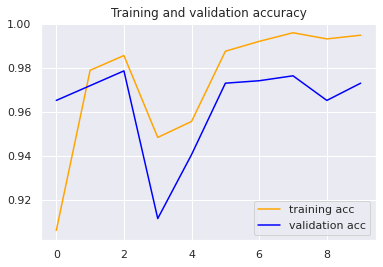

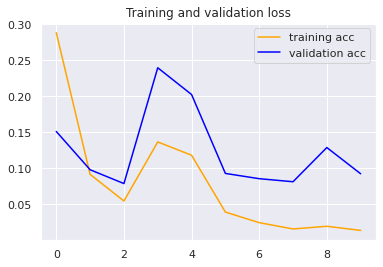

In [ ]:
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:

acc = model.evaluate(texts_test, y_test)
proba_rnn = model.predict(texts_test)
pred = np.argmax(proba_rnn,axis=1)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

35/35 [==============================] - 2s 54ms/step - loss: 0.0507 - acc: 0.9839
Test loss is 0.05 accuracy is 0.98  
[[985 130]
 [  0   0]]


As we can see simple RNN has some inherent issue and true negative is reduced to 0